# Project 1
## House price prediction using XGBoost regressor
### Data: Boston house price dataset

### Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','TARGET']

data = pd.read_csv('data/housing.csv',header=None,delimiter=r"\s+",names=feature_names)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Data Analysis

In [25]:
data.shape

(506, 14)

In [22]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [26]:
# obtain statistical measures of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

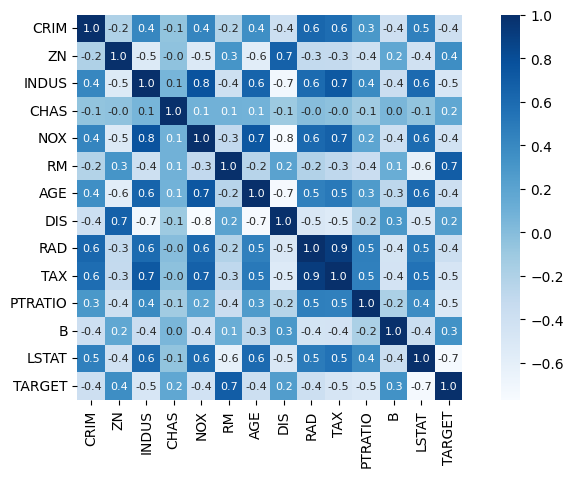

In [34]:
# correlation matrix of features
corr_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

### Data Pre-processing

In [37]:
# splitting the dataset into features and target
X = data.drop(['TARGET'],axis=1)
y = data['TARGET']
print(X,'/n/n',y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [40]:
# splitting the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape,y.shape,y_train.shape,y_test.shape)

(506, 13) (404, 13) (102, 13) (506,) (404,) (102,)


### Model

In [42]:
# loading the model
model = XGBRegressor()

# train the model with X_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

#### Training evaluations

In [44]:
# training predictions
training_predictions = model.predict(X_train)
# R squared error
score1 = metrics.r2_score(y_train,training_predictions)
# Mean absolute error
score2 = metrics.mean_absolute_error(y_train,training_predictions)
print(f'R squared error: {score1}\nMean absolute error: {score2}')

R squared error: 0.9999969829984965
Mean absolute error: 0.011182523717974735


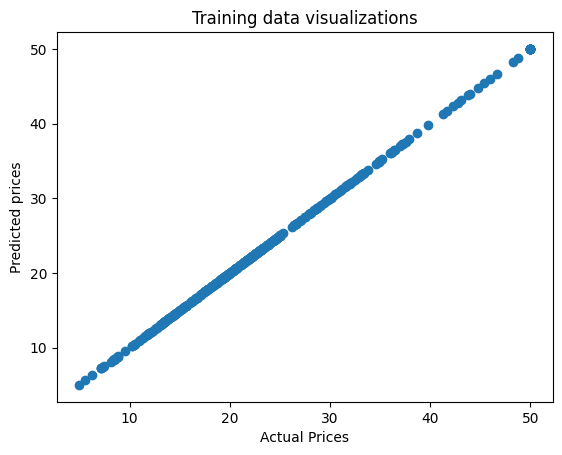

In [46]:
plt.scatter(y_train,training_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Training data visualizations")
plt.show()

#### Test evaluations

In [45]:
# training predictions
test_predictions = model.predict(X_test)
# R squared error
score1 = metrics.r2_score(y_test,test_predictions)
# Mean absolute error
score2 = metrics.mean_absolute_error(y_test,test_predictions)
print(f'R squared error: {score1}\nMean absolute error: {score2}')

R squared error: 0.9057837838492537
Mean absolute error: 1.8908873698290656


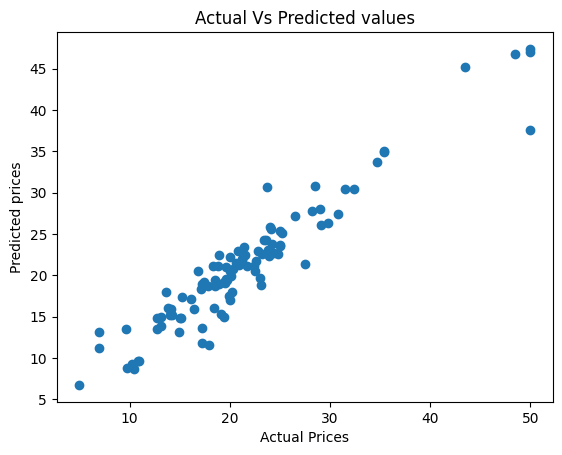

In [47]:
plt.scatter(y_test,test_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Vs Predicted values")
plt.show()